In [461]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

from mlxtend.classifier import StackingClassifier

In [462]:
train_data = pd.read_csv('credit_card_default_train.csv')
test_data = pd.read_csv('credit_card_default_test.csv')

In [463]:
cat_cols = ['Gender','EDUCATION_STATUS','MARITAL_STATUS','AGE','PAY_JULY','PAY_AUG','PAY_SEP','PAY_OCT','PAY_NOV','PAY_DEC']
target = 'NEXT_MONTH_DEFAULT'
ID = 'Client_ID'
num_cols = [col for col in train_data.columns.tolist() if col not in cat_cols +[target]+[ID]]

In [464]:
num_cols

['Balance_Limit_V1',
 'DUE_AMT_JULY',
 'DUE_AMT_AUG',
 'DUE_AMT_SEP',
 'DUE_AMT_OCT',
 'DUE_AMT_NOV',
 'DUE_AMT_DEC',
 'PAID_AMT_JULY',
 'PAID_AMT_AUG',
 'PAID_AMT_SEP',
 'PAID_AMT_OCT',
 'PAID_AMT_NOV',
 'PAID_AMT_DEC']

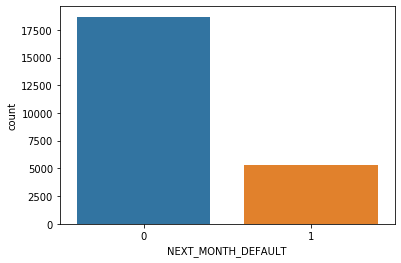

In [465]:
sns.countplot(x=target, data=train_data)

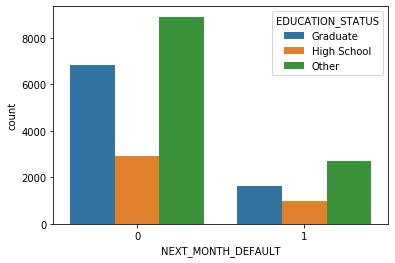

In [466]:
sns.countplot(x=target, data=train_data, hue ='EDUCATION_STATUS')

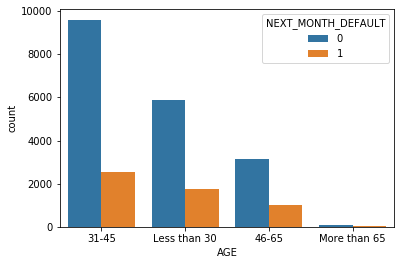

In [467]:
sns.countplot(x='AGE', data=train_data, hue =target)

In [468]:
def Paid_Due_Aug(row):
    if row['PAID_AMT_AUG'] == 0:
        val = row['DUE_AMT_AUG']
    else:
        val = row['DUE_AMT_AUG']/row['PAID_AMT_AUG']
    return val

In [469]:
def Paid_Due_Sep(row):
    if row['PAID_AMT_SEP'] == 0:
        val = row['DUE_AMT_SEP']
    else:
        val = row['DUE_AMT_SEP']/row['PAID_AMT_SEP']
    return val

In [470]:
def Paid_Due_Oct(row):
    if row['PAID_AMT_OCT'] == 0:
        val = row['DUE_AMT_OCT']
    else:
        val = row['DUE_AMT_OCT']/row['PAID_AMT_OCT']
    return val

In [471]:
def Paid_Due_Nov(row):
    if row['PAID_AMT_NOV'] == 0:
        val = row['DUE_AMT_NOV']
    else:
        val = row['DUE_AMT_NOV']/row['PAID_AMT_NOV']
    return val

In [472]:
def Paid_Due_Dec(row):
    if row['PAID_AMT_DEC'] == 0:
        val = row['DUE_AMT_DEC']
    else:
        val = row['DUE_AMT_DEC']/row['PAID_AMT_DEC']
    return val

In [473]:
def Paid_Due_July(row):
    if row['PAID_AMT_JULY'] == 0:
        val = row['DUE_AMT_JULY']
    else:
        val = row['DUE_AMT_JULY']/row['PAID_AMT_JULY']
    return val

In [474]:
train_data['PAID_DUE_JULY'] = train_data.apply(Paid_Due_July, axis=1)
train_data['PAID_DUE_AUG'] = train_data.apply(Paid_Due_Aug, axis=1)
train_data['PAID_DUE_SEP'] = train_data.apply(Paid_Due_Sep, axis=1)
train_data['PAID_DUE_OCT'] = train_data.apply(Paid_Due_Oct, axis=1)
train_data['PAID_DUE_NOV'] = train_data.apply(Paid_Due_Nov, axis=1)
train_data['PAID_DUE_DEC'] = train_data.apply(Paid_Due_Dec, axis=1)

test_data['PAID_DUE_JULY'] = test_data.apply(Paid_Due_July, axis=1)
test_data['PAID_DUE_AUG'] = test_data.apply(Paid_Due_Aug, axis=1)
test_data['PAID_DUE_SEP'] = test_data.apply(Paid_Due_Sep, axis=1)
test_data['PAID_DUE_OCT'] = test_data.apply(Paid_Due_Oct, axis=1)
test_data['PAID_DUE_NOV'] = test_data.apply(Paid_Due_Nov, axis=1)
test_data['PAID_DUE_DEC'] = test_data.apply(Paid_Due_Dec, axis=1)

In [475]:
train_data['PAY_TOT'] = train_data['PAY_JULY'] + train_data['PAY_AUG'] + train_data['PAY_SEP'] + train_data['PAY_OCT'] + train_data['PAY_NOV'] + train_data['PAY_DEC']
test_data['PAY_TOT'] = test_data['PAY_JULY'] + test_data['PAY_AUG'] + test_data['PAY_SEP'] + test_data['PAY_OCT'] + test_data['PAY_NOV'] + test_data['PAY_DEC']

In [476]:
def isZero(row):
    if row['PAY_TOT'] == 0:
        val = 1
    else:
        val = 0
    return val

In [477]:
train_data['PAY_TOT_0'] = train_data.apply(isZero, axis=1)
test_data['PAY_TOT_0'] = test_data.apply(isZero, axis=1)

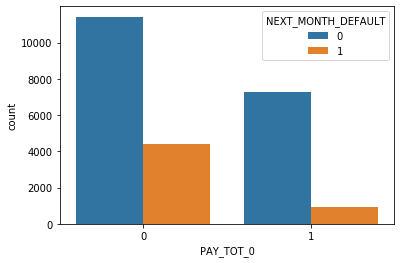

In [478]:
sns.countplot(x = 'PAY_TOT_0',data=train_data,hue=target)

In [479]:
train_data.head()

,Client_ID,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,...,PAID_AMT_DEC,NEXT_MONTH_DEFAULT,PAID_DUE_JULY,PAID_DUE_AUG,PAID_DUE_SEP,PAID_DUE_OCT,PAID_DUE_NOV,PAID_DUE_DEC,PAY_TOT,PAY_TOT_0
0,A2,1M,M,Graduate,Other,31-45,-1,-1,-1,-1,...,538165,0,0.945010,0.564457,0.152316,0.242167,162772.000000,-0.025981,-6,0
1,A3,1M,F,High School,Other,Less than 30,0,-1,-1,-1,...,33666,0,2.327464,3.286104,0.619067,0.538664,85.786624,3.700766,-4,0
2,A4,100K,F,High School,Single,31-45,4,3,2,2,...,0,1,16681.000000,16082.000000,15477.000000,0.000000,0.000000,0.000000,7,0
3,A5,200K,F,Graduate,Single,31-45,2,0,0,0,...,3918,1,23.464851,23.868380,25.755682,21.062554,24.784638,26.222563,2,0
4,A6,1M,F,Graduate,Other,31-45,2,2,0,0,...,17325,0,429556.000000,20.176335,26.579159,25.128658,27.149015,26.199076,4,0


In [480]:
LabelEncoder = LabelEncoder()
train_data['Balance_Limit_V1_cat'] = LabelEncoder.fit_transform(train_data['Balance_Limit_V1'])
train_data['Gender_cat'] = LabelEncoder.fit_transform(train_data['Gender'])
train_data['EDUCATION_STATUS_cat'] = LabelEncoder.fit_transform(train_data['EDUCATION_STATUS'])
train_data['MARITAL_STATUS_cat'] = LabelEncoder.fit_transform(train_data['MARITAL_STATUS'])
train_data['AGE_cat'] = LabelEncoder.fit_transform(train_data['AGE'])

test_data['Balance_Limit_V1_cat'] = LabelEncoder.fit_transform(test_data['Balance_Limit_V1'])
test_data['Gender_cat'] = LabelEncoder.fit_transform(test_data['Gender'])
test_data['EDUCATION_STATUS_cat'] = LabelEncoder.fit_transform(test_data['EDUCATION_STATUS'])
test_data['MARITAL_STATUS_cat'] = LabelEncoder.fit_transform(test_data['MARITAL_STATUS'])
test_data['AGE_cat'] = LabelEncoder.fit_transform(test_data['AGE'])

In [481]:
train_data

,Client_ID,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,...,PAID_DUE_OCT,PAID_DUE_NOV,PAID_DUE_DEC,PAY_TOT,PAY_TOT_0,Balance_Limit_V1_cat,Gender_cat,EDUCATION_STATUS_cat,MARITAL_STATUS_cat,AGE_cat
0,A2,1M,M,Graduate,Other,31-45,-1,-1,-1,-1,...,0.242167,162772.000000,-0.025981,-6,0,3,1,0,0,0
1,A3,1M,F,High School,Other,Less than 30,0,-1,-1,-1,...,0.538664,85.786624,3.700766,-4,0,3,0,1,0,2
2,A4,100K,F,High School,Single,31-45,4,3,2,2,...,0.000000,0.000000,0.000000,7,0,2,0,1,1,0
3,A5,200K,F,Graduate,Single,31-45,2,0,0,0,...,21.062554,24.784638,26.222563,2,0,5,0,0,1,0
4,A6,1M,F,Graduate,Other,31-45,2,2,0,0,...,25.128658,27.149015,26.199076,4,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,A29996,1M,F,High School,Single,31-45,0,0,0,0,...,28.880381,6.247359,15.980087,0,1,3,0,1,1,0
23996,A29997,400K,F,High School,Other,31-45,-1,-1,-1,-1,...,69.600671,11989.000000,0.000000,-4,0,7,0,1,0,0
23997,A29998,100K,F,Other,Other,31-45,4,3,2,-1,...,4.970934,10.290909,6.244240,8,0,2,0,2,0,0
23998,A29999,200K,F,High School,Single,31-45,1,-1,0,0,...,27.401214,0.223831,27.132469,-1,0,5,0,1,1,0


In [482]:
X_train, X_test, y_train, y_test = train_test_split(train_data.drop([target,ID,'Balance_Limit_V1','Gender','EDUCATION_STATUS','MARITAL_STATUS','AGE'],axis=1), 
                                                    train_data[target], test_size=0.30)

In [483]:
X_train

,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,...,PAID_DUE_OCT,PAID_DUE_NOV,PAID_DUE_DEC,PAY_TOT,PAY_TOT_0,Balance_Limit_V1_cat,Gender_cat,EDUCATION_STATUS_cat,MARITAL_STATUS_cat,AGE_cat
5147,0,0,0,2,2,2,48362,47695,49806,42592,...,3.687619,47630.000000,2.197727,6,0,2,1,0,0,2
14768,2,0,0,0,-1,-1,112058,111381,58194,36362,...,5.176085,7025.000000,0.000000,0,1,5,1,2,0,2
8046,0,0,0,0,0,0,112266,110462,112097,90430,...,27.962276,22.537560,18.879004,0,1,5,1,2,0,2
20131,2,2,2,2,2,2,103047,102977,107584,109748,...,23.754978,24.212554,114350.000000,12,0,5,1,0,0,2
3920,-1,-1,-1,-1,-1,-1,6482,753,1562,753,...,1.000000,1.000000,0.189291,-6,0,7,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21903,-2,-2,-2,-2,-2,-2,0,0,0,0,...,0.000000,0.000000,0.000000,-12,0,3,0,2,1,0
8615,2,2,2,0,0,0,31767,41453,41134,40263,...,17.191716,18.191031,9.689472,6,0,5,0,2,0,2
19383,0,0,0,0,-2,-2,88672,94077,89159,0,...,0.000000,0.000000,0.000000,-4,0,3,0,2,0,0
8388,-1,3,2,2,-1,0,1726,1150,575,0,...,0.000000,27.381925,27.902840,5,0,5,1,1,1,1


In [484]:
#param_grid = {'bootstrap': [True, False],
# 'max_features': ['auto', 'sqrt'],
# 'n_estimators': [100,150,200]}
model_rf = RandomForestClassifier(n_estimators=400,criterion='gini',max_features ='auto',bootstrap=True,max_depth=100,warm_start=True)
#model_rf.fit(train_data.drop([target,ID,'Balance_Limit_V1','Gender','EDUCATION_STATUS','MARITAL_STATUS','AGE'],axis=1),train_data[target])
model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=True)

In [485]:
#preds_rf = model_rf.predict(test_data.drop([ID,'Balance_Limit_V1','Gender','EDUCATION_STATUS','MARITAL_STATUS','AGE'],axis=1))
preds_rf = model_rf.predict(X_test)

In [486]:
print(classification_report(y_test,preds_rf))
print ('\n')
print(confusion_matrix(y_test,preds_rf))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      5590
           1       0.62      0.37      0.47      1610

    accuracy                           0.81      7200
   macro avg       0.73      0.65      0.67      7200
weighted avg       0.79      0.81      0.79      7200



[[5221  369]
 [1009  601]]


In [487]:
model_ada = AdaBoostClassifier(n_estimators=200,learning_rate = 1.15)
#model_ada.fit(X_train,y_train)
model_ada.fit(train_data.drop([target,ID,'Balance_Limit_V1','Gender','EDUCATION_STATUS','MARITAL_STATUS','AGE'],axis=1),train_data[target])

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.15,
                   n_estimators=200, random_state=None)

In [488]:
#preds_ada = model_ada.predict(X_test)
preds_ada = model_ada.predict(test_data.drop([ID,'Balance_Limit_V1','Gender','EDUCATION_STATUS','MARITAL_STATUS','AGE'],axis=1))

In [411]:
print(classification_report(y_test,preds_ada))
print ('\n')
print(confusion_matrix(y_test,preds_ada))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5585
           1       0.68      0.37      0.48      1615

    accuracy                           0.82      7200
   macro avg       0.76      0.66      0.68      7200
weighted avg       0.80      0.82      0.80      7200



[[5302  283]
 [1022  593]]


In [412]:
model_stack = StackingClassifier(classifiers=[model_rf,model_ada],meta_classifier=LogisticRegression())
model_stack.fit(X_train,y_train)

StackingClassifier(average_probas=False,
                   classifiers=[RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=100,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weig

In [413]:
preds_stack = model_stack.predict(X_test)

In [414]:
print(classification_report(y_test,preds_stack))
print ('\n')
print(confusion_matrix(y_test,preds_stack))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5585
           1       0.65      0.38      0.48      1615

    accuracy                           0.82      7200
   macro avg       0.75      0.66      0.69      7200
weighted avg       0.80      0.82      0.80      7200



[[5256  329]
 [ 997  618]]


In [489]:
sample_submission = pd.DataFrame(columns=[ID,target])

In [490]:
sample_submission[ID]=test_data[ID]
sample_submission[target] = preds_ada

In [491]:
sample_submission.set_index(ID)

,NEXT_MONTH_DEFAULT
Client_ID,
A20170,0
A16887,0
A3430,0
A3696,0
A20474,0
...,...
A11104,0
A2781,0
A1767,0


In [492]:
submission = sample_submission.to_csv('data-storm-day1-2.csv',index = None)